<a href="https://colab.research.google.com/github/dwkaris/Exploratory-Data-Analysis-WEEK-2-IP/blob/master/DUNCAN_KARIUKI_WEEK4_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**WEEK 4 INDEPENDENT PROJECT**

#**HYPOTHESIS TESTING**

#1.DEFINING THE ANALYTIC QUESTION

##a) SPECIFYING THE DATA ANALYTIC QUESTION

Is the number of bluecars taken from paris on weekdays less than the average number of 8000 bluecars rented in a day?


##b) DEFINING THE METRICS OF SUCCESS

Conducting an experiment to determine the claim that number of bluecars taken from paris on weekdays is less than from the average number of 8000 bluecars rented in a day

##c) UNDERSTANDING THE CONTEXT

Our research problem aims at figuring out if the number of bluecars taken from paris on weekdays is less than the average number of  bluecars rented in a day. This will help the company undestand the demand and usage of the blue cars and hence help boost the companies performance.


##d) RECORDING THE EXPERIMETAL DESIGN


1.   We will first conduct univariate analysis which will give us insight into each collected variable
2.   We will then conduct bivariate analysis which will enable us to check relationships between our collected variables



##e) DATA RELEVANCE

OUR DATA IS RELEVANT AS IT WILL ACT AS A SAMPLE REPRESENTING ALL NUMBER OF BLUECARS RENTED OUT BY THE AUTOLIB SYSYTEM.

#2.READING DATA

##IMPORTING OUR LIBRARIES

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##LOADING OUR DATASET

In [0]:
auto = pd.read_csv('http://bit.ly/DSCoreAutolibDataset')


#3.CHEKING THE DATA

In [407]:
#Cheking the no. records of data in our dataset
auto.shape

(16085, 13)

In [408]:
#Preview the top 5 rows of our dataset
auto.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [409]:
# Preview bottom 5 rows of our dataset
auto.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [410]:
# checking for information about our data
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [411]:
#describing our data inorder to understand it
auto.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


#4.EXTERNAL DATASOURCE VALIDATION

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number.

#5.TIDYING THE DATASET

In [0]:
# Removing white spaces and ensuring uniformity in our dataset
# replace '/' with '-' on the date column
auto.columns = auto.columns.str.strip().str.replace(' ',' ').str.upper()
auto['DATE'] = auto['DATE'].str.strip().str.replace('/','-')
auto['DAY_TYPE']= auto['DAY_TYPE'].str.strip().str.replace(' ',' ').str.lower()

In [413]:
df.head()

,DATE,BLUECARS_RETURNED_SUM,BLUECARS_TAKEN_SUM,SLOTS_FREED_SUM,SLOTS_TAKEN_SUM
0,1-1-2018,8144,8098,1906,1897
1,1-10-2018,7565,7695,1883,1855
2,1-11-2018,7807,7738,1917,1928
3,1-12-2018,8609,8668,2104,2100
4,1-15-2018,7451,7443,1820,1790


In [414]:
# Identifying the Missing Data
auto.isnull().sum()
# There are no missing values hence we will not perform any action to drop values from our dataset

POSTAL CODE               0
DATE                      0
N_DAILY_DATA_POINTS       0
DAYOFWEEK                 0
DAY_TYPE                  0
BLUECARS_TAKEN_SUM        0
BLUECARS_RETURNED_SUM     0
UTILIB_TAKEN_SUM          0
UTILIB_RETURNED_SUM       0
UTILIB_14_TAKEN_SUM       0
UTILIB_14_RETURNED_SUM    0
SLOTS_FREED_SUM           0
SLOTS_TAKEN_SUM           0
dtype: int64

In [415]:
#drop duplicates in our data if any
auto.drop_duplicates().head()

,POSTAL CODE,DATE,N_DAILY_DATA_POINTS,DAYOFWEEK,DAY_TYPE,BLUECARS_TAKEN_SUM,BLUECARS_RETURNED_SUM,UTILIB_TAKEN_SUM,UTILIB_RETURNED_SUM,UTILIB_14_TAKEN_SUM,UTILIB_14_RETURNED_SUM,SLOTS_FREED_SUM,SLOTS_TAKEN_SUM
0,75001,1-1-2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1-2-2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1-3-2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1-4-2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1-5-2018,1440,4,weekday,114,117,3,3,6,6,18,20


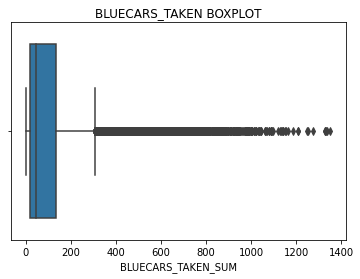

In [416]:
#checking for outliers
# our claim forcuses o one column hence we will check for outliers in this column only

sns.boxplot(auto['BLUECARS_TAKEN_SUM'], orient='h')
plt.title('BLUECARS_TAKEN BOXPLOT')

plt.show()

# we have outliers in our data this may have occured due to the large number of entiries into our dataset
# hence the large number of bluecars taken will become conspicuous on the boxplot 

In [417]:
#drop other car types which are not bluecars since our study only focuses on bluecars

auto.drop(['UTILIB_TAKEN_SUM','UTILIB_RETURNED_SUM','UTILIB_14_TAKEN_SUM','UTILIB_14_RETURNED_SUM'], axis= 1,inplace=True)
auto.head(2)

,POSTAL CODE,DATE,N_DAILY_DATA_POINTS,DAYOFWEEK,DAY_TYPE,BLUECARS_TAKEN_SUM,BLUECARS_RETURNED_SUM,SLOTS_FREED_SUM,SLOTS_TAKEN_SUM
0,75001,1-1-2018,1440,0,weekday,110,103,22,20
1,75001,1-2-2018,1438,1,weekday,98,94,23,22


In [0]:
#filteing our data to get our disied data
#get only weekdays
df = auto[auto['DAY_TYPE']=='weekday']

# Get only cars operational in paris
# The postal code for Paris ranges from 75000 to 76000
#Hence we will filter this codes

df = df[df['POSTAL CODE']<76000]



In [419]:
# We will then group our data into days
# we first convert POSTAL CODE column to sting
df['POSTAL CODE'].astype(str)

#we then group our data into days
df = pd.pivot_table(df, index= ['DATE'], aggfunc='sum')

df.reset_index(level=(0), inplace=True)
df

,DATE,BLUECARS_RETURNED_SUM,BLUECARS_TAKEN_SUM,DAYOFWEEK,N_DAILY_DATA_POINTS,POSTAL CODE,SLOTS_FREED_SUM,SLOTS_TAKEN_SUM
0,1-1-2018,8144,8098,0,31680,1650438,1906,1897
1,1-10-2018,7565,7695,44,31680,1650438,1883,1855
2,1-11-2018,7807,7738,66,31680,1650438,1917,1928
3,1-12-2018,8609,8668,88,31658,1650438,2104,2100
4,1-15-2018,7451,7443,0,31680,1650438,1820,1790
...,...,...,...,...,...,...,...,...
107,6-4-2018,7816,7819,0,31680,1650438,2017,2012
108,6-5-2018,8456,8651,22,31658,1650438,2266,2230
109,6-6-2018,8423,8506,44,31680,1650438,2229,2253
110,6-7-2018,8303,8345,66,31658,1650438,2254,2229


In [0]:
#Drop columns we do not need for our study
df.drop(['DAYOFWEEK', 'N_DAILY_DATA_POINTS','POSTAL CODE'], axis = 1, inplace = True)

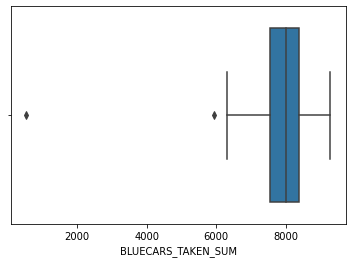

In [421]:
#CHECK FOR OUTLIERS
sns.boxplot(df['BLUECARS_TAKEN_SUM'])

In [0]:
#Remove outliers

df = df[df['BLUECARS_TAKEN_SUM']>6000]

#6.EXPLANATORY ANAYSIS

##UNIVARIATE ANALYSIS

In [0]:
# group with postal codes
postal = pd.pivot_table(auto, index=['POSTAL CODE'], aggfunc='sum')
postal.reset_index(level = 0, inplace = True)

In [424]:
# measures of central tendancy
#mode
# print(postal[postal['BLUECARS_TAKEN_SUM']==139925])
# print(postal[postal['BLUECARS_TAKEN_SUM']==305])

postal.describe()

#The code above gives a a grouped summary of our dataset
#postal code 75015 has the highest number of bluecars taken
#postal code 75015 has the highest number of bluecars taken
#postal code 93390 has the lowest number of bluecars taken
#mean number of blue cars taken is 19476
#median is 7038

,POSTAL CODE,BLUECARS_RETURNED_SUM,BLUECARS_TAKEN_SUM,DAYOFWEEK,N_DAILY_DATA_POINTS,SLOTS_FREED_SUM,SLOTS_TAKEN_SUM
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,88828.153846,19474.096154,19476.298077,459.288462,221374.548077,3499.884615,3499.923077
std,7662.918108,28090.530203,28093.724871,22.157281,10996.267530,7895.052470,7895.622358
min,75001.000000,302.000000,305.000000,254.000000,120431.000000,0.000000,0.000000
25%,91360.000000,3054.500000,3070.500000,463.000000,223281.000000,0.000000,0.000000
50%,92345.000000,7028.500000,7038.500000,463.000000,223281.000000,0.000000,0.000000
75%,93392.500000,21052.500000,21068.250000,463.000000,223281.000000,671.250000,672.500000
max,95880.000000,139943.000000,139925.000000,463.000000,223281.000000,37271.000000,37298.000000


In [425]:
# MODE

auto['DAYOFWEEK'].mode()
# MONDAY IS THE DAY OF THE WEEK WITH HIGHEST MODE

0    0
dtype: int64

In [426]:
#Descibe our data on days
df.describe()

,BLUECARS_RETURNED_SUM,BLUECARS_TAKEN_SUM,SLOTS_FREED_SUM,SLOTS_TAKEN_SUM
count,110.000000,110.000000,110.000000,110.000000
mean,7912.554545,7963.327273,2109.627273,2106.736364
std,633.636636,626.371846,214.957084,217.359537
min,6374.000000,6314.000000,1582.000000,1601.000000
25%,7455.750000,7561.000000,1968.250000,1960.000000
50%,7960.500000,8031.000000,2112.500000,2106.500000
75%,8389.000000,8399.000000,2254.750000,2252.000000
max,9255.000000,9288.000000,2597.000000,2614.000000


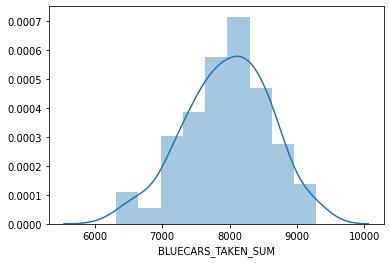

In [427]:
#histogram showing distribution of our data

sns.distplot(df['BLUECARS_TAKEN_SUM'])

In [428]:
print(df['BLUECARS_TAKEN_SUM'].skew())
#BLUECARS TAKEN IS WEEKLY NEGATIVELY SKEWED

print(df['BLUECARS_TAKEN_SUM'].kurt())
#kurtosis is almost zero hence depicting characteristics of normal data

-0.25415142066869745
-0.1641917143465612


##BIVARIATE ANAYSIS


In [429]:
# Analysis of our numeric data
#import research py
!pip install researchpy
import researchpy as rp
print('BLUE CAR TAKEN PER POSTAL CODE')
print(round(rp.summary_cont(auto.groupby(['POSTAL CODE'])['BLUECARS_TAKEN_SUM'])))
print('\n')
print('BLUECAR_TAKEN PER DAY')
print(round(rp.summary_cont(df.groupby(['DATE'])['BLUECARS_TAKEN_SUM'])))

BLUE CAR TAKEN PER POSTAL CODE


               N   Mean    SD   SE  95% Conf.  Interval
POSTAL CODE                                            
75001        156  135.0  39.0  3.0      129.0     141.0
75002        156  174.0  41.0  3.0      167.0     180.0
75003        156  238.0  61.0  5.0      229.0     248.0
75004        156  202.0  62.0  5.0      192.0     211.0
75005        156  306.0  63.0  5.0      296.0     316.0
...          ...    ...   ...  ...        ...       ...
94700        156   34.0  12.0  1.0       32.0      36.0
94800        156   80.0  23.0  2.0       76.0      84.0
95100        156   24.0  16.0  1.0       21.0      27.0
95870        156   15.0   7.0  1.0       14.0      16.0
95880        156   16.0  10.0  1.0       14.0      18.0

[104 rows x 6 columns]


BLUECAR_TAKEN PER DAY


           N  Mean  SD  SE  95% Conf.  Interval
DATE                                           
1-1-2018   1  8098 NaN NaN        NaN       NaN
1-10-2018  1  7695 NaN NaN        NaN       N

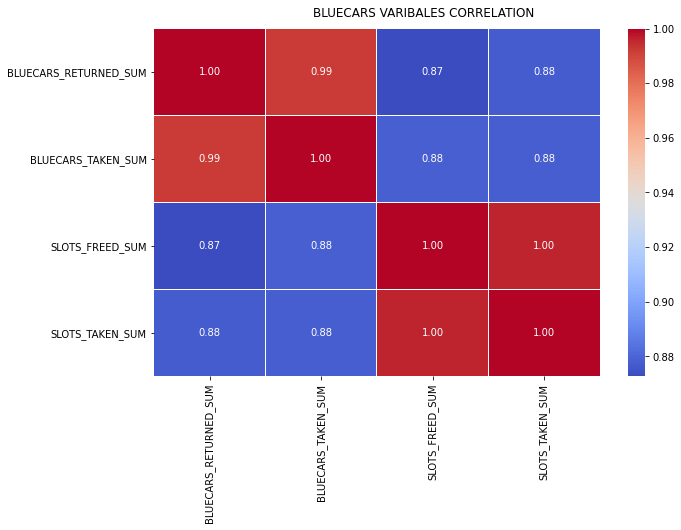

In [430]:
#VISUALIZING CORRELATION BETWEEEN DIFFRENT FIELDS
f , ax = plt.subplots(figsize = (10,6))
corr = df.corr()
cor = sns.heatmap(corr, annot = True, ax =ax , cmap = "coolwarm", fmt = '.2f',linewidths= .05)
f.subplots_adjust(top =0.93)
t = f.suptitle('BLUECARS VARIBALES CORRELATION')

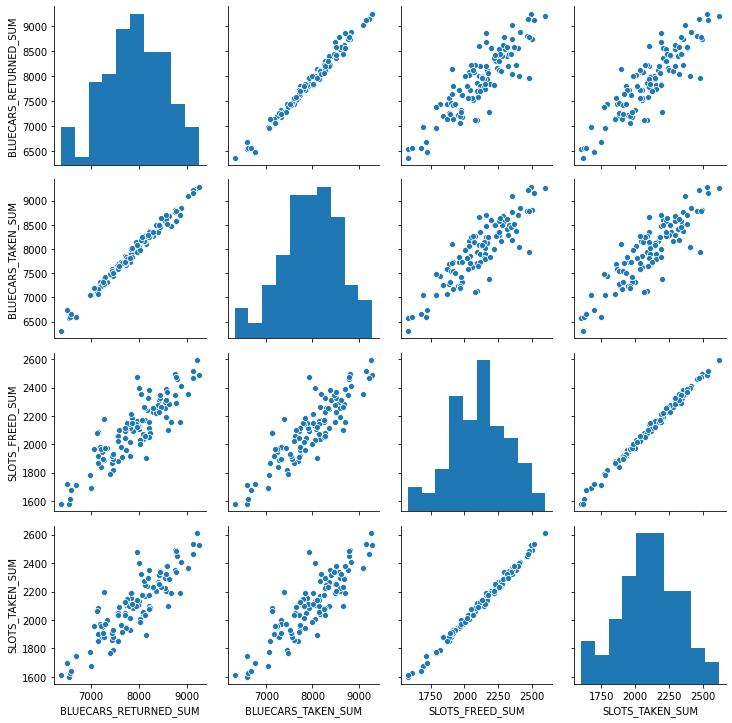

In [431]:
# pair plot
sns.pairplot(df)
plt.show()
# ALMOST ALL OUR FIELDS ARE POSITIVELY STRONGLY CORRELATED

#7.IMPLEMENTING THE SOLUTION


##Check for normality

In [432]:
#we will use  Shapiro Wilk test to check if our data is normal

from scipy.stats import shapiro

stat,p = shapiro(df['BLUECARS_TAKEN_SUM'])
print('statistic = %.3f, p= %.3f' % (stat,p))

alpha= 0.05
if p>0.005:
  print('Sample looks Gaussian')
else:
  print('sample does not look Gaussian')

# our data follows a normal distribution

statistic = 0.989, p= 0.486
Sample looks Gaussian


## random sampling

In [433]:
# We will use simple random sampling to select the 25 weekdays days by which we will collect our data
# We will collect data from our database 

import random 
sample = df.sample(n=86)
sample
# our smple size has been determied by sampling formular

,DATE,BLUECARS_RETURNED_SUM,BLUECARS_TAKEN_SUM,SLOTS_FREED_SUM,SLOTS_TAKEN_SUM
58,3-5-2018,7266,7279,1889,1883
39,2-8-2018,7120,7122,2078,2064
74,4-24-2018,6971,7055,1787,1775
43,3-13-2018,7727,7836,1957,1941
57,3-30-2018,8561,8597,2193,2205
...,...,...,...,...,...
59,3-6-2018,7954,8134,2166,2143
109,6-6-2018,8423,8506,2229,2253
73,4-23-2018,6374,6314,1583,1611
18,1-31-2018,8136,8160,2170,2169


#8.CHALLENGING THE SOLUTION

## Hypothesis Testing

*Assumptions*


1.   Our data follows a normal distribution
2.   our data has been randomly selected




In [434]:
# check for normality
# we will use the Anderson_Darling Test
from scipy.stats import anderson
result = anderson(sample['BLUECARS_TAKEN_SUM'])

print('statistic = %.3f' % result.statistic)
p = 0

for i in range(len(result.critical_values)):
  s1,cv = result.significance_level[i] , result.critical_values[i]
 
  if result.statistic < result.critical_values[i]:
    print('%.3f : %.3f, data looks Normal'% (s1,cv))
  else:
      print('%.3f : %.3f, data doesnt looks Normal'% (s1,cv))

statistic = 0.260
15.000 : 0.552, data looks Normal
10.000 : 0.629, data looks Normal
5.000 : 0.754, data looks Normal
2.500 : 0.880, data looks Normal
1.000 : 1.047, data looks Normal


In [435]:
from scipy.stats import shapiro

stat,p = shapiro(sample['BLUECARS_TAKEN_SUM'])
print('statistic = %.3f, p= %.3f' % (stat,p))

alpha= 0.05
if p>0.05:
  print('Sample looks Gaussian')
else:
  print('sample does not look Gaussian')

# our data follows a normal distribution

statistic = 0.988, p= 0.609
Sample looks Gaussian





1.   Ho : Number of average cars rented per day in paris is 9000
2.   H1 : The average number of cars rented per day is less than 9000



Acceptance criteria

our p_value = 0.05

In [436]:
# describe our sample
sample['BLUECARS_TAKEN_SUM'].describe()

count      86.000000
mean     7945.174419
std       623.526521
min      6314.000000
25%      7561.000000
50%      7957.500000
75%      8371.250000
max      9268.000000
Name: BLUECARS_TAKEN_SUM, dtype: float64

In [437]:
# Find our test statistic

u = 8000
X = sample['BLUECARS_TAKEN_SUM'].mean()
s = sample['BLUECARS_TAKEN_SUM'].std()
n= 86

zscore = ((X-u)/(s/n**0.5))
zscore

-0.8154128311791786

In [438]:
#finding our p values

from scipy.stats import norm

p = stats.norm.cdf(zscore)
p

0.20741802105517554

In [0]:
sample.to_csv('sampledf.csv')

CONCLUSION -

We will reject the alternative hypothesis in favour of the null hypothesis

There is not enough evidence to support the claim that the number of blue cars rented out in paris is less than to 8000

#9.Follow up questions


a). Did we have the right data?

Yes
 
because using the data we were able to conduct an experiment on our claim

b). Do we need other data to answer our question?

no.

The data provided was sufficient

c). Did we have the right question?
YES

We were able to make conclusion from our data